# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import seaborn as sns

### 데이터 살펴보기

In [11]:
dataset = pd.read_table('data/mini.csv',sep=',')

In [12]:
dataset.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

### 첫번째 가설

- 학습 활동이 활발한 사용자일수록 구독 연장 가능성이 높을 것이다.

  "월간 활동적인 학습 일수"와 "최근 학습 성취도"로 알아보자!

In [13]:
# 최근 학습 성취도를 0 ~ 100까지의 퍼센트 범위로 표현하기 위해 int형으로 변환
dataset['recent_learning_achievement'] = dataset['recent_learning_achievement'].astype(int)
dataset.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81,2,4,Medium,Basic,3,0,1


In [31]:
# 10 단위로 분류하기
dataset['categorized_recent_learning_achievement'] = (dataset['recent_learning_achievement'] / 10).astype(int) * 10
dataset.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,categorized_recent_learning_achievement
0,b919c29d,13,14,14.946163,8.427187,18,16,68,3,4,Low,Basic,4,5,0,60
1,a0a60abb,16,18,18.453224,72.646087,16,13,97,2,3,Medium,Basic,1,6,1,90
2,b9f171ae,22,1,16.195228,21.774492,13,14,94,3,4,Medium,Premium,0,7,1,90
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70,0,3,Low,Basic,1,0,1,70
4,65c83654,4,5,21.390656,30.744287,19,10,81,2,4,Medium,Basic,3,0,1,80


In [23]:
# 분류된 성취도의 개수 구하기
count_ctgr_achv = dataset['categorized_recent_learning_achievement'].value_counts().sort_index()
count_ctgr_achv

categorized_recent_learning_achievement
30        3
40       56
50      616
60     2396
70     3823
80     2456
90      592
100      56
110       2
Name: count, dtype: int64

In [24]:
# 월간 활동적인 학습 일수 전처리 하기
count_mnth_actv = dataset['monthly_active_learning_days'].value_counts().sort_index()
count_mnth_actv

monthly_active_learning_days
1     395
2     397
3     412
4     446
5     423
6     406
7     422
8     452
9     415
10    435
11    368
12    423
13    398
14    414
15    420
16    389
17    433
18    401
19    428
20    447
21    416
22    405
23    396
24    459
Name: count, dtype: int64

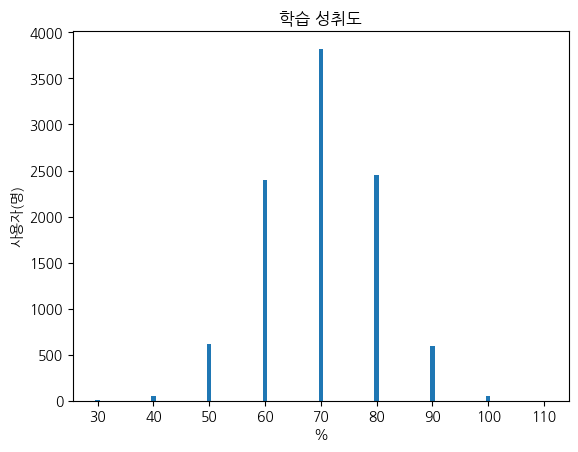

In [33]:
plt.bar(count_ctgr_achv.index, count_ctgr_achv.values)

plt.xlabel('%')
plt.ylabel('사용자(명)')
plt.title('학습 성취도')
plt.xticks()
plt.show()

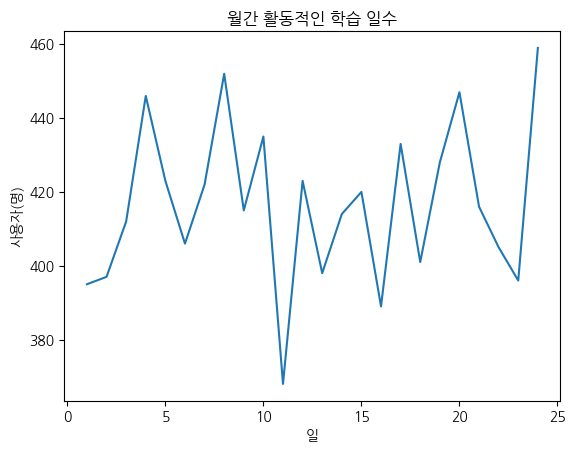

In [34]:
plt.plot(count_mnth_actv.index, count_mnth_actv.values)

plt.xlabel('일')
plt.ylabel('사용자(명)')
plt.title('월간 활동적인 학습 일수')
plt.xticks()
plt.show()

In [40]:
#피벗테이블 만들기
pivot1 = pd.pivot_table(dataset, values='user_id',
                       index=['categorized_recent_learning_achievement'],
                       columns=['monthly_active_learning_days'],  
                       aggfunc="count")
pivot1.head()

monthly_active_learning_days,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
categorized_recent_learning_achievement,,,,,,,,,,,,,,,,,,,,,
30,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2.0,2.0,5.0,3.0,2.0,4.0,NaN,7.0,NaN,4.0,...,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0
50,24.0,28.0,32.0,25.0,29.0,19.0,24.0,33.0,22.0,35.0,...,25.0,25.0,17.0,27.0,25.0,34.0,22.0,28.0,21.0,25.0
60,94.0,110.0,102.0,115.0,127.0,95.0,117.0,98.0,98.0,88.0,...,98.0,103.0,96.0,102.0,90.0,95.0,90.0,105.0,100.0,102.0
70,156.0,149.0,156.0,175.0,153.0,169.0,149.0,177.0,158.0,168.0,...,144.0,136.0,173.0,143.0,177.0,177.0,157.0,161.0,156.0,173.0


In [41]:
pivot1.fillna(0, inplace=True)
pivot1.head()

monthly_active_learning_days,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
categorized_recent_learning_achievement,,,,,,,,,,,,,,,,,,,,,
30,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,2.0,2.0,5.0,3.0,2.0,4.0,0.0,7.0,0.0,4.0,...,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0
50,24.0,28.0,32.0,25.0,29.0,19.0,24.0,33.0,22.0,35.0,...,25.0,25.0,17.0,27.0,25.0,34.0,22.0,28.0,21.0,25.0
60,94.0,110.0,102.0,115.0,127.0,95.0,117.0,98.0,98.0,88.0,...,98.0,103.0,96.0,102.0,90.0,95.0,90.0,105.0,100.0,102.0
70,156.0,149.0,156.0,175.0,153.0,169.0,149.0,177.0,158.0,168.0,...,144.0,136.0,173.0,143.0,177.0,177.0,157.0,161.0,156.0,173.0


Text(0, 0.5, '%')

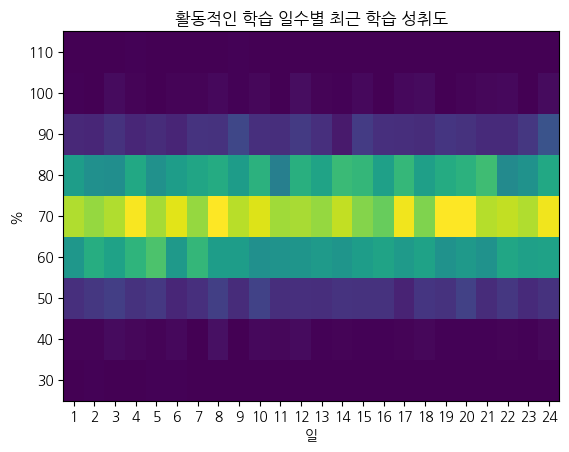

In [47]:
#pcolor를 이용하여 heatmap 그리기
plt.pcolor(pivot1)

#히트맵에서의 x축
plt.xticks(np.arange(0.5, len(pivot1.columns), 1), pivot1.columns)

#히트맵에서의 y축
plt.yticks(np.arange(0.5, len(pivot1.index), 1), pivot1.index)

#그래프 명
plt.title('활동적인 학습 일수별 최근 학습 성취도')

#그래프 x축 레이블
plt.xlabel('일')

#그래프 y축 레이블
plt.ylabel('%')

### 첫번째 가설 분석 결론 도출

학습 활동이 활발한 사용자는 구독을 연장할 가능성이 높을 것으로 첫번째 가설을 세웠다.

이를 확인하기 위해 "월간 활동적인 학습 일수"와 "최근 학습 성취도" 데이터를 분석했고 상단의 히트맵 그래프에 따르면 학습 일수가 증가함에 따라 성취도가 꾸준히 상승하지는 않는 것으로 나타난다. 

따라서 활동적인 학습 일수와 최근 학습 성취도는 단순히 비례하지 않는 것으로 판단되며, "학습 활동이 활발하다."는 기준을 해당 데이터만으로는 명확히 하기 어려운 것으로 보인다.

### 두번째 가설

- 꾸준히 결제를 하지 않는 사용자일수록 학습 활동이 활발하지 않아 구독 연장 가능성이 떨어질 것이다.

   "사용자의 지난 3개월 간의 결제 패턴"과 "중단된 학습 세션 수"로 알아보자!

* payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
    - 0: 3개월 동안 결제 X
    - 1: 마지막 달에만 결제
    - 2: 가운데 달에만 결제
    - 3: 마지막 2개월에 결제
    - 4: 첫 달에만 결제
    - 5: 첫 달과 마지막 달에 결제
    - 6: 첫 2개월은 결제했으나 마지막 달에는 결제 X
    - 7: 3개월 모두 결제

In [53]:
pp_abss = dataset.groupby('payment_pattern')['abandoned_learning_sessions'].sum()
pp_abss

payment_pattern
0    3742
1    3884
2    3817
3    3758
4    3642
5    3816
6    3847
7    3930
Name: abandoned_learning_sessions, dtype: int64

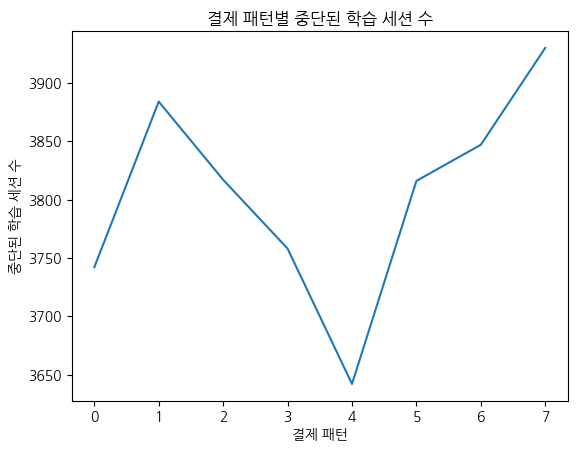

In [56]:
plt.plot(pp_abss.index, pp_abss.values)
plt.title('결제 패턴별 중단된 학습 세션 수')
plt.xlabel('결제 패턴')
plt.ylabel('중단된 학습 세션 수')

plt.show()

### 두번째 가설 분석 결론 도출

꾸준한 결제를 유지하지 않는 사용자의 경우 학습 활동이 활발하지 않아 구독 연장 가능성이 낮을 것으로 두 번째 가설을 세웠다.

이를 확인하기 위해 "사용자의 지난 3개월 간의 결제 패턴"과 "중단된 학습 세션 수" 데이터를 분석했고 그 결과 각 결제 패턴별 중단된 학습 세션 수가 큰 차이를 보였다. 

특히 첫 달에만 결제한 경우(4) 중단된 학습 세션 수가 가장 적었으며, 3개월 동안 지속적으로 결제한 경우(7)에는 중단된 학습 세션 수가 가장 많은 것으로 나타났다.

이로써 두 번째 가설은 예상과는 반대로 3개월 동안 지속적으로 결제한 경우가 상대적으로 학습 활동이 활발하지 않은 것으로 판단된다.

### 세번째 가설

- 비싼 구독 유형을 이용할수록 서비스에 대한 충성도가 높아 구독 연장 가능성이 높을 것이다.

   "구독 유형"과 "사용자의 지난 3개월 간의 결제 패턴", "완료한 총 코스 수"로 알아보자!

In [64]:
mean_cplt = dataset.groupby('subscription_type')['total_completed_courses'].mean()
mean_cplt

subscription_type
Basic      11.015722
Premium    14.029346
Name: total_completed_courses, dtype: float64

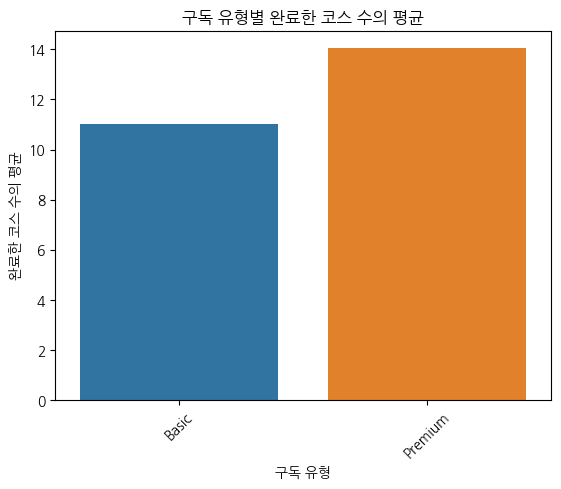

In [65]:
sns.barplot(x=mean_cplt.index, y=mean_cplt.values)
plt.xlabel('구독 유형')
plt.ylabel('완료한 코스 수의 평균')
plt.title('구독 유형별 완료한 코스 수의 평균')
plt.xticks(rotation=45)

plt.show()

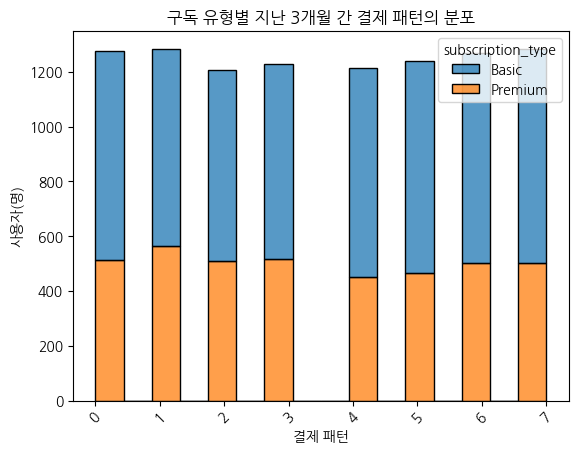

In [66]:
sns.histplot(data=dataset, x='payment_pattern', hue='subscription_type', multiple='stack')
plt.xlabel('결제 패턴')
plt.ylabel('사용자(명)')
plt.title('구독 유형별 지난 3개월 간 결제 패턴의 분포')
plt.xticks(rotation=45)

plt.show()

### 세번째 가설 분석 결론 도출

비싼 구독 유형을 선택한 사용자일수록 서비스에 대한 충성도가 높아 구독 연장 가능성이 높을 것으로 세 번째 가설을 세웠다.

이를 확인하기 위해 "구독 유형", "사용자의 지난 3개월 간의 결제 패턴", "완료한 총 코스 수" 데이터를 분석했고 Premium 구독 유형을 선택한 사용자가 완료한 코스 수가 평균적으로 더 많은 것으로 나타났다.

이어서 구독 유형별로 지난 3개월 간의 결제 패턴을 살펴본 결과 Basic 구독 유형을 이용하는 사용자의 경우 결제 패턴이 고르게 분포하고 그 중에서도 3개월 동안 지속적으로 결제한 경우(7)가 가장 많았다. 반면에 Premium 구독 유형을 이용하는 사용자는 결제 빈도가 상대적으로 낮았으며 마지막 달에만 결제한 경우(1)가 가장 많은 것으로 확인되었다.

이로써 세 번째 가설은 예상과는 반대로 비교적 저렴한 Basic 구독 유형을 선택한 사용자가 서비스에 대한 충성도가 더 높은 것으로 판단된다.

### 종합적인 분석 결론 도출

월간 활동적인 학습 일수와 최근 학습 성취도에 관한 가설은 데이터가 부족하여 구독 연장 가능성에 대한 명확한 결론을 내릴 수 없었다. 활동적인 학습 일수와 최근 학습 성취도 사이에는 직접적인 관련성이 없는 것으로 보인다.

결제 패턴과 중단된 학습 세션 수에 관한 가설은 3개월 동안 지속적으로 결제한 경우가 학습 활동이 활발하지 않고 1개월만 결제한 경우가 학습 활동이 가장 활발한 것으로 나타났다. 그러나 활발한 학습 활동과 구독 연장 사이의 관련성을 찾지 못했기 때문에 재분석이 필요해 보인다.

구독 유형과 완료한 총 코스 수에 관한 가설에서는 저렴한 Basic 구독 유형을 선택한 사용자들이 서비스에 대한 충성도가 높은 것으로 나타났다. 따라서 Basic 구독 유형을 선택한 사용자들이 구독을 연장할 가능성이 높을 것으로 예상된다.

종합적으로, Basic 구독 유형을 선택한 사용자가 구독을 연장할 가능성이 가장 높다고 판단된다.